<a href="https://colab.research.google.com/github/JohnVarghese2021/flipkart_scrapper/blob/main/flipkart_scraper_with_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Web Scraper**

In [72]:
import requests
from bs4 import BeautifulSoup

headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cache-Control': 'max-age=0',
    'Connection': 'keep-alive',
    'Referer': 'https://in.search.yahoo.com/',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-User': '?1',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
    'sec-ch-ua': '^\\^Chromium^\\^;v=^\\^116^\\^, ^\\^Not)A;Brand^\\^;v=^\\^24^\\^, ^\\^Google',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '^\\^Windows^\\^',
}

params = (
    ('sid', '6bo,b5g'),
    ('marketplace', 'FLIPKART'),
)

response = requests.get('https://www.flipkart.com/laptops/pr', headers=headers, params=params)

#NB. Original query string below. It seems impossible to parse and
#reproduce query strings 100% accurately so the one below is given
#in case the reproduced version is not "correct".
# response = requests.get('https://www.flipkart.com/laptops/pr?sid=6bo,b5g&marketplace=FLIPKART', headers=headers, cookies=cookies)


In [73]:
response.text

'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.d4bb4f.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" h

In [74]:
soup = BeautifulSoup(response.text, 'html.parser')

In [75]:
main_box = soup.find_all("div", {"class": "_1AtVbE"})

In [76]:
len(main_box)
#main_box[3]

30

In [77]:
box = main_box[4]
r = box.find("span", {"class":"_2_R_DZ"}).text.strip()
print(r)
x = r.split("&")[0]
y = r.split("&")[1].strip()
print(x+"&"+y)

32 Ratings & 5 Reviews
32 Ratings &5 Reviews


In [83]:
x = 4
data_list = []
while x<=27:
  box = main_box[x]
  temp_dict={}
  temp_dict['TITLE'] = box.find("div", {"class":"_4rR01T"}).text.strip()
  temp_dict['RATING'] = box.find("div", {"class":"_3LWZlK"}).text.strip()
  r = box.find("span", {"class":"_2_R_DZ"}).text.strip()
  ratings = r.split("&")[0] .strip()
  reviews = r.split("&")[1].strip()
  temp_dict['OUT OF'] = ratings
  temp_dict['REVIEWS'] = reviews
  temp_dict['PRICE'] = box.find("div", {"class":"_30jeq3 _1_WHN1"}).text.replace('₹','').strip()
  data_list.append(temp_dict)
  x+=1


AttributeError: ignored

In [79]:
data_list


[{'TITLE': 'Lenovo LOQ Core i7 13620H 13th Gen - (16 GB/512 GB SSD/Windows 11 Home/8 GB Graphics/NVIDIA GeForce RT...',
  'RATING': '4.1',
  'OUT OF': '32 Ratings',
  'REVIEWS': '5 Reviews',
  'PRICE': '1,14,990'},
 {'TITLE': 'DELL Core i5 1235U 12th Gen - (8 GB/512 GB SSD/Windows 11 Home) New Inspiron 15 Laptop Thin and Light ...',
  'RATING': '4.1',
  'OUT OF': '121 Ratings',
  'REVIEWS': '12 Reviews',
  'PRICE': '55,990'},
 {'TITLE': 'ASUS Vivobook 15 Core i3 1115G4 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515EA-EJ322WS | X515EA-E...',
  'RATING': '4.3',
  'OUT OF': '6,207 Ratings',
  'REVIEWS': '605 Reviews',
  'PRICE': '37,990'},
 {'TITLE': 'ASUS Vivobook 15 Core i5 1135G7 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515EA-EJ522WS Thin and L...',
  'RATING': '4.3',
  'OUT OF': '3,081 Ratings',
  'REVIEWS': '238 Reviews',
  'PRICE': '47,990'},
 {'TITLE': 'APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A',
  'RATING': '4.7',
  'OUT OF': '11,518 Ratings',


**Data Storage**

In [80]:
import pandas as pd

In [81]:
df = pd.DataFrame(data_list)

In [82]:
df

,TITLE,RATING,OUT OF,REVIEWS,PRICE
0,Lenovo LOQ Core i7 13620H 13th Gen - (16 GB/51...,4.1,32 Ratings,5 Reviews,"1,14,990"
1,DELL Core i5 1235U 12th Gen - (8 GB/512 GB SSD...,4.1,121 Ratings,12 Reviews,"55,990"
2,ASUS Vivobook 15 Core i3 1115G4 11th Gen - (8 ...,4.3,"6,207 Ratings",605 Reviews,"37,990"
3,ASUS Vivobook 15 Core i5 1135G7 11th Gen - (8 ...,4.3,"3,081 Ratings",238 Reviews,"47,990"
4,APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...,4.7,"11,518 Ratings",993 Reviews,"81,990"
5,Lenovo V15 Ryzen 5 Hexa Core 5500U - (8 GB/512...,4.2,568 Ratings,69 Reviews,"34,990"
6,HP 247 G8 Athlon Dual Core - (8 GB/1 TB HDD/Wi...,3.7,510 Ratings,45 Reviews,"23,490"
7,Lenovo Legion 5 AMD Ryzen 7 Octa Core 5800H - ...,4.4,68 Ratings,13 Reviews,"1,04,990"
8,DELL Inspiron Core i3 1115G4 11th Gen - (8 GB/...,4.1,"1,031 Ratings",152 Reviews,"39,790"
9,DELL Inspiron Core i3 1115G4 11th Gen - (8 GB/...,4.1,"1,031 Ratings",152 Reviews,"38,790"


**Data Manipulation**

In [85]:
new_df=pd.DataFrame()

In [86]:
print(df.iloc[1][1])

4.1


In [87]:
new_df.insert(loc = 0, column = "Laptop Name", value = df.TITLE)
new_df.insert(loc = 1, column = "Price (INR)", value = df.PRICE)
new_df.insert(loc = 2, column = "Rating (5)", value = df.RATING)


In [88]:
new_df

,Laptop Name,Price (INR),Rating (5)
0,Lenovo LOQ Core i7 13620H 13th Gen - (16 GB/51...,"1,14,990",4.1
1,DELL Core i5 1235U 12th Gen - (8 GB/512 GB SSD...,"55,990",4.1
2,ASUS Vivobook 15 Core i3 1115G4 11th Gen - (8 ...,"37,990",4.3
3,ASUS Vivobook 15 Core i5 1135G7 11th Gen - (8 ...,"47,990",4.3
4,APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...,"81,990",4.7
5,Lenovo V15 Ryzen 5 Hexa Core 5500U - (8 GB/512...,"34,990",4.2
6,HP 247 G8 Athlon Dual Core - (8 GB/1 TB HDD/Wi...,"23,490",3.7
7,Lenovo Legion 5 AMD Ryzen 7 Octa Core 5800H - ...,"1,04,990",4.4
8,DELL Inspiron Core i3 1115G4 11th Gen - (8 GB/...,"39,790",4.1
9,DELL Inspiron Core i3 1115G4 11th Gen - (8 GB/...,"38,790",4.1


In [89]:
x = new_df["Laptop Name"]

In [90]:
Lap_names = []
for i in x:
  s = i.split("-")
  Lap_names.append(s[0])



In [91]:
Lap_names

['Lenovo LOQ Core i7 13620H 13th Gen ',
 'DELL Core i5 1235U 12th Gen ',
 'ASUS Vivobook 15 Core i3 1115G4 11th Gen ',
 'ASUS Vivobook 15 Core i5 1135G7 11th Gen ',
 'APPLE 2020 Macbook Air M1 ',
 'Lenovo V15 Ryzen 5 Hexa Core 5500U ',
 'HP 247 G8 Athlon Dual Core ',
 'Lenovo Legion 5 AMD Ryzen 7 Octa Core 5800H ',
 'DELL Inspiron Core i3 1115G4 11th Gen ',
 'DELL Inspiron Core i3 1115G4 11th Gen ']

In [92]:
newer_df = pd.DataFrame()

In [93]:
newer_df.insert(loc = 0, column = "Laptop Name", value = Lap_names)
newer_df.insert(loc = 1, column = "Price (INR)", value = df.PRICE)
newer_df.insert(loc = 2, column = "Rating (5)", value = df.RATING)

In [94]:
newer_df

,Laptop Name,Price (INR),Rating (5)
0,Lenovo LOQ Core i7 13620H 13th Gen,"1,14,990",4.1
1,DELL Core i5 1235U 12th Gen,"55,990",4.1
2,ASUS Vivobook 15 Core i3 1115G4 11th Gen,"37,990",4.3
3,ASUS Vivobook 15 Core i5 1135G7 11th Gen,"47,990",4.3
4,APPLE 2020 Macbook Air M1,"81,990",4.7
5,Lenovo V15 Ryzen 5 Hexa Core 5500U,"34,990",4.2
6,HP 247 G8 Athlon Dual Core,"23,490",3.7
7,Lenovo Legion 5 AMD Ryzen 7 Octa Core 5800H,"1,04,990",4.4
8,DELL Inspiron Core i3 1115G4 11th Gen,"39,790",4.1
9,DELL Inspiron Core i3 1115G4 11th Gen,"38,790",4.1


**Data Visualization**

In [34]:
import matplotlib.pyplot as plt

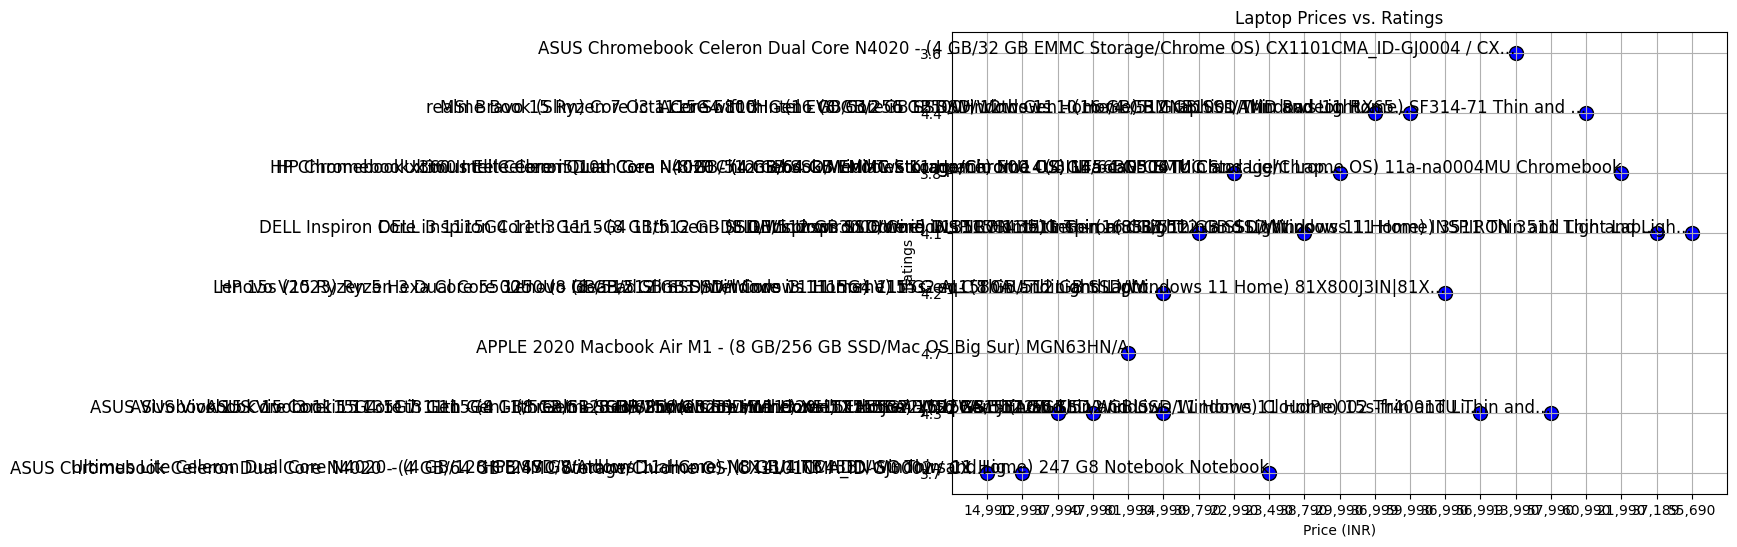

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(new_df['Price (INR)'], new_df['Rating (5)'], c='blue', marker='o', edgecolors='black', s=100)
plt.title('Laptop Prices vs. Ratings')
plt.xlabel('Price (INR)')
plt.ylabel('Ratings')

# Add labels for each data point
for i, row in new_df.iterrows():
    plt.annotate(row['Laptop Name'], (row['Price (INR)'], row['Rating (5)']), fontsize=12, ha='right')

plt.grid(True)
plt.show()


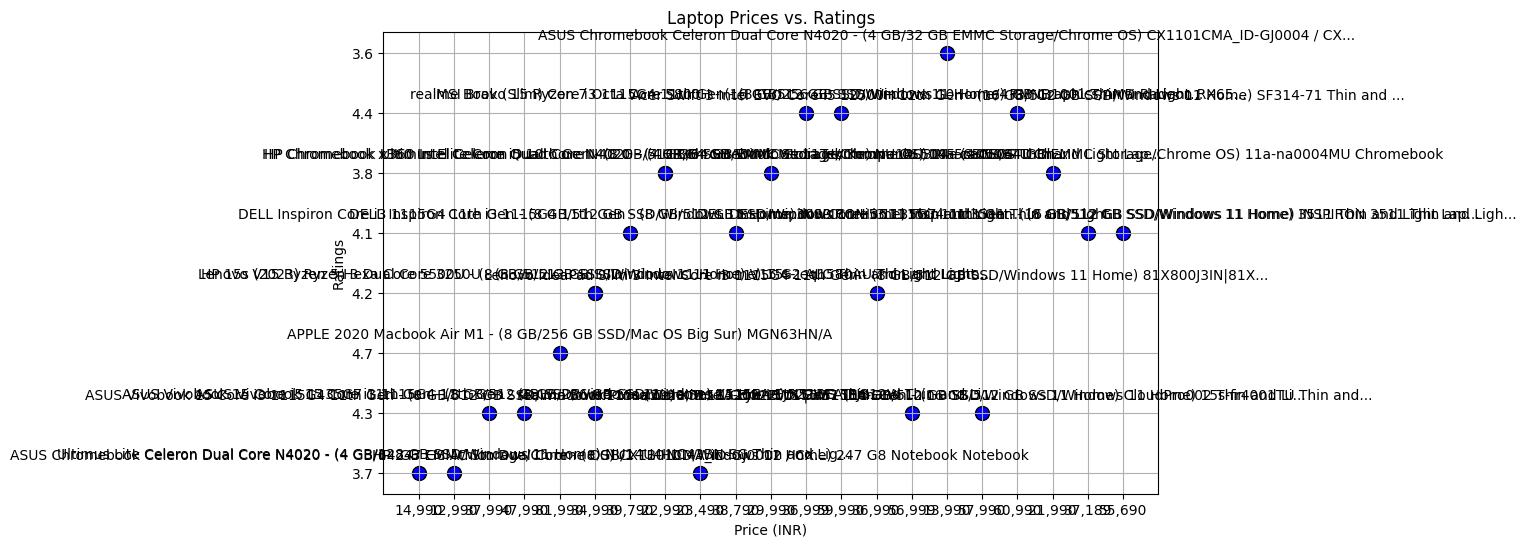

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(new_df['Price (INR)'], new_df['Rating (5)'], c='blue', marker='o', edgecolors='black', s=100)
plt.title('Laptop Prices vs. Ratings')
plt.xlabel('Price (INR)')
plt.ylabel('Ratings')

# Add labels for each data point with adjusted positions
for i, row in new_df.iterrows():
    plt.annotate(row['Laptop Name'], (row['Price (INR)'], row['Rating (5)']),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

plt.grid(True)
plt.show()


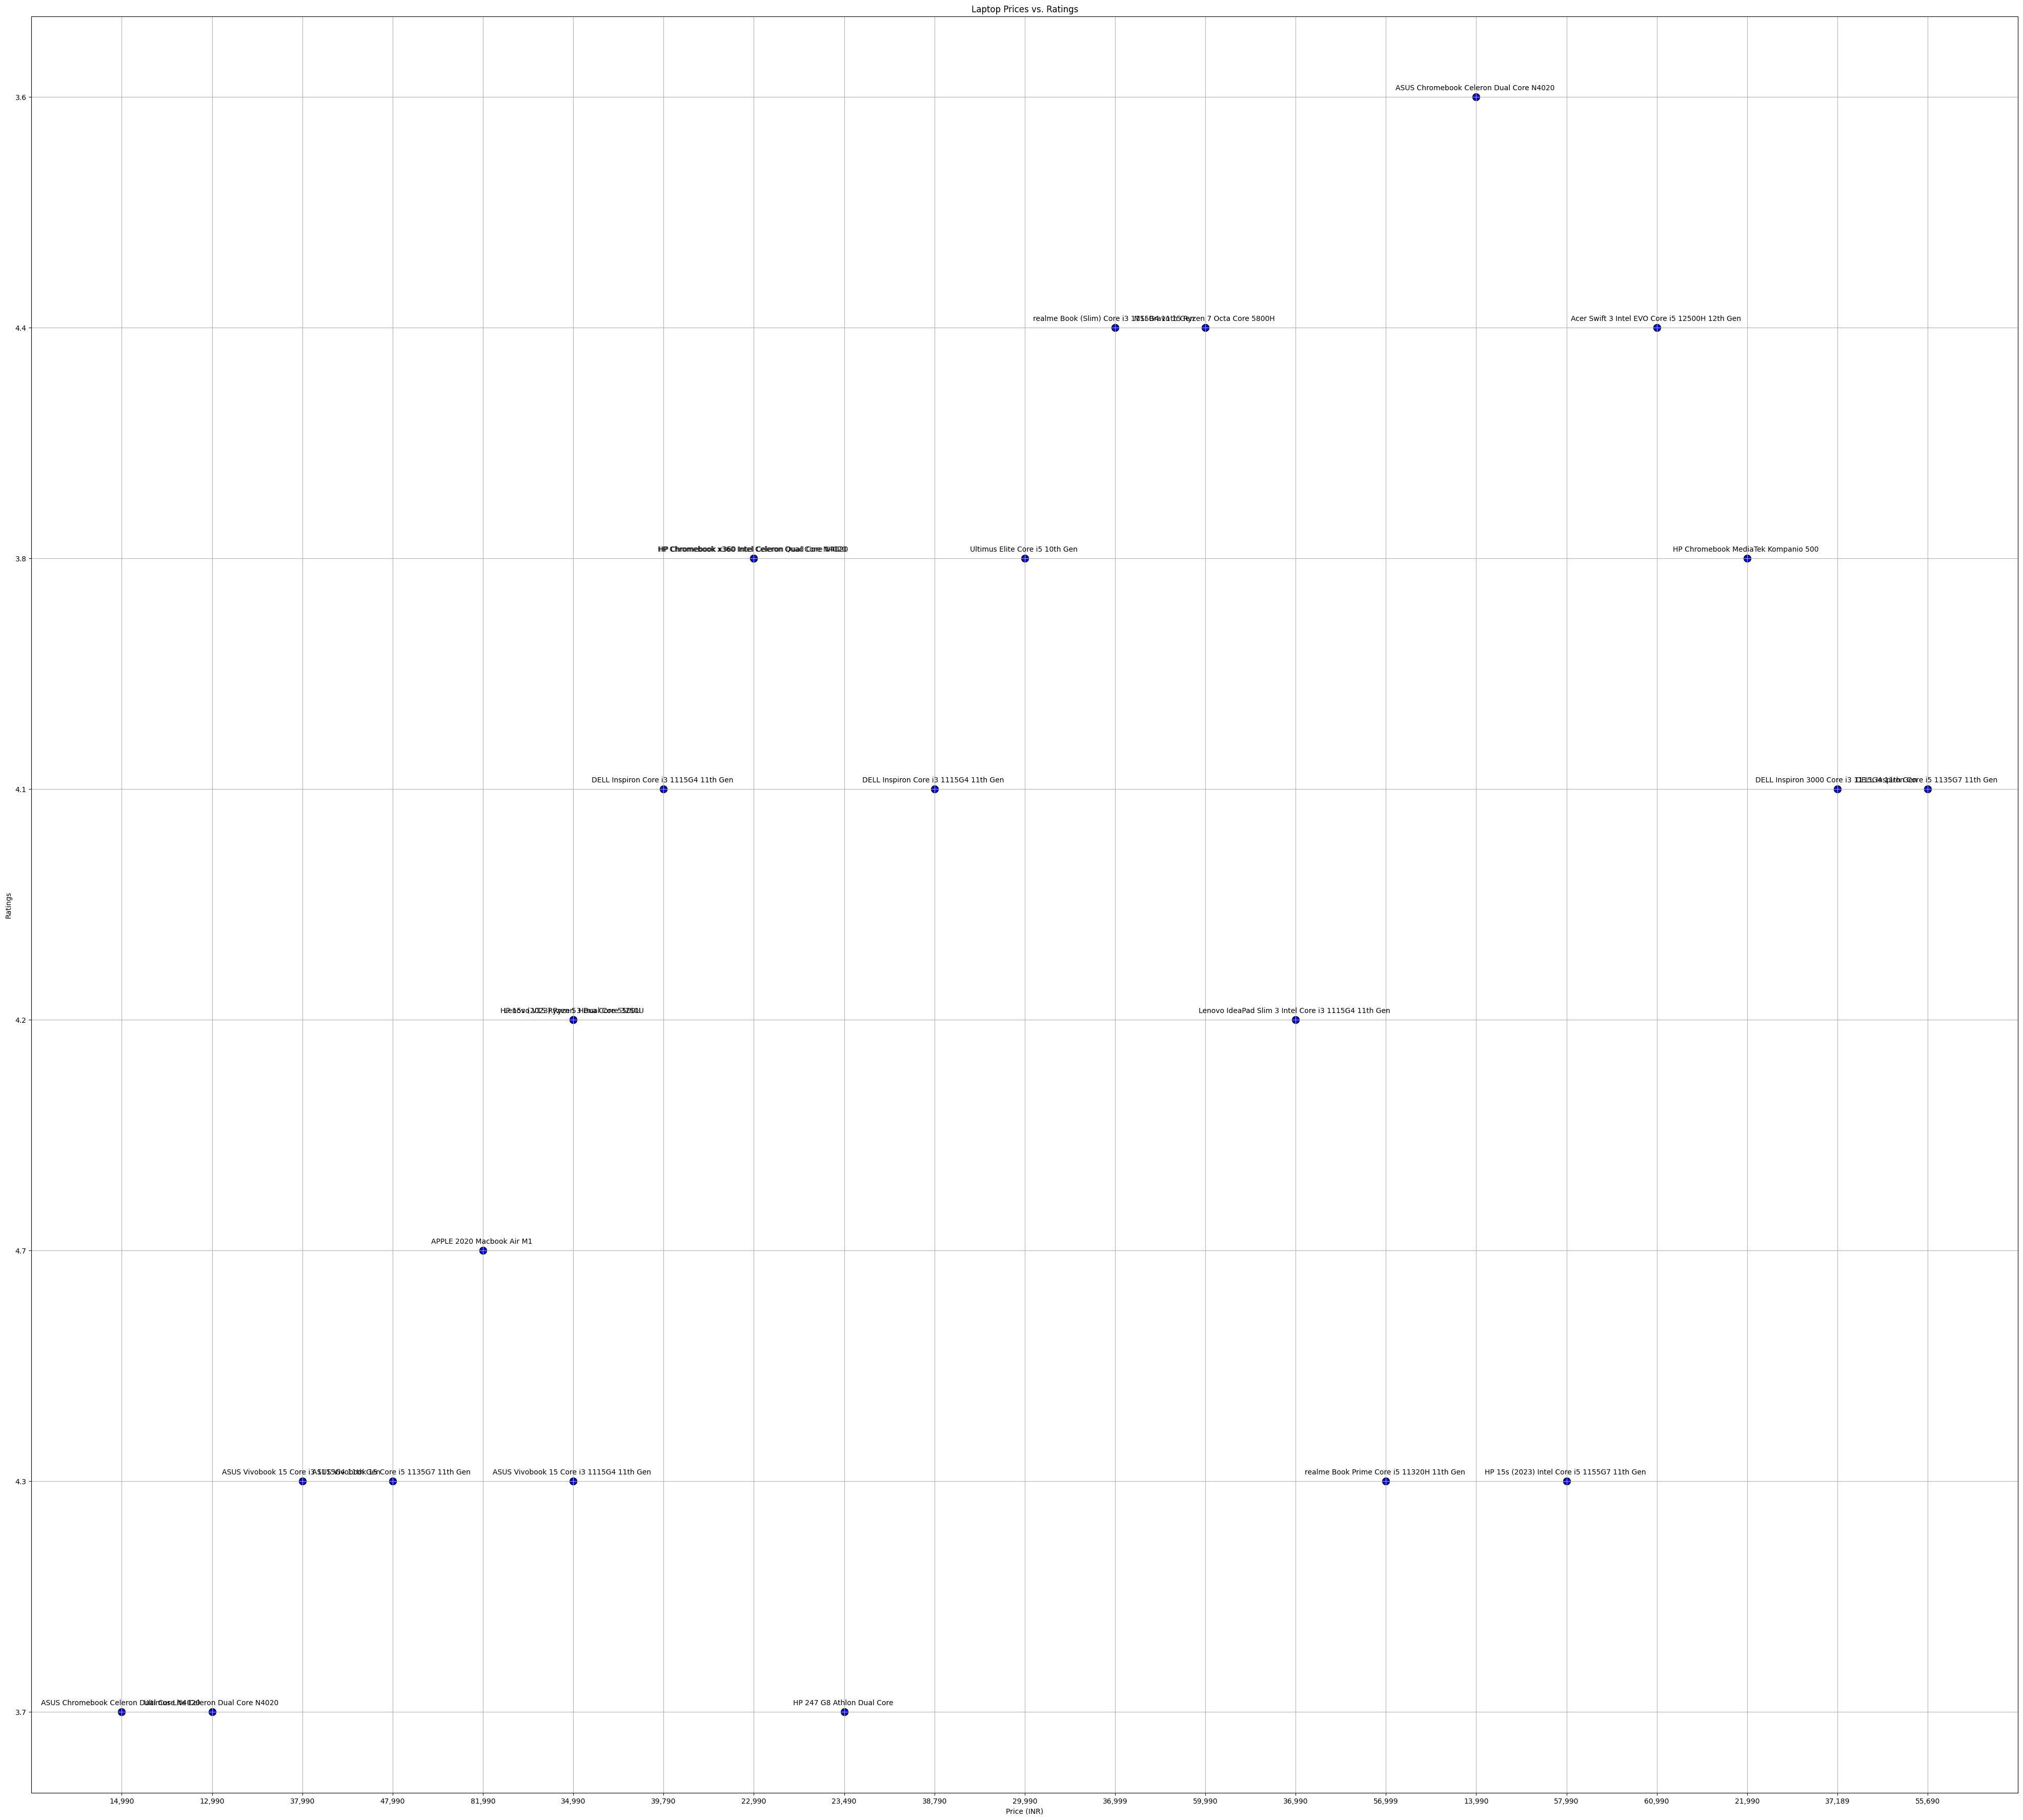

In [37]:
plt.figure(figsize=(50, 45))  # Increased the figsize to make the plot larger
plt.scatter(new_df['Price (INR)'], new_df['Rating (5)'], c='blue', marker='o', edgecolors='black', s=100)
plt.title('Laptop Prices vs. Ratings')
plt.xlabel('Price (INR)')
plt.ylabel('Ratings')

# Add labels for each data point with adjusted positions
for i, row in newer_df.iterrows():
    plt.annotate(row['Laptop Name'], (row['Price (INR)'], row['Rating (5)']),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

plt.grid(True)
plt.show()


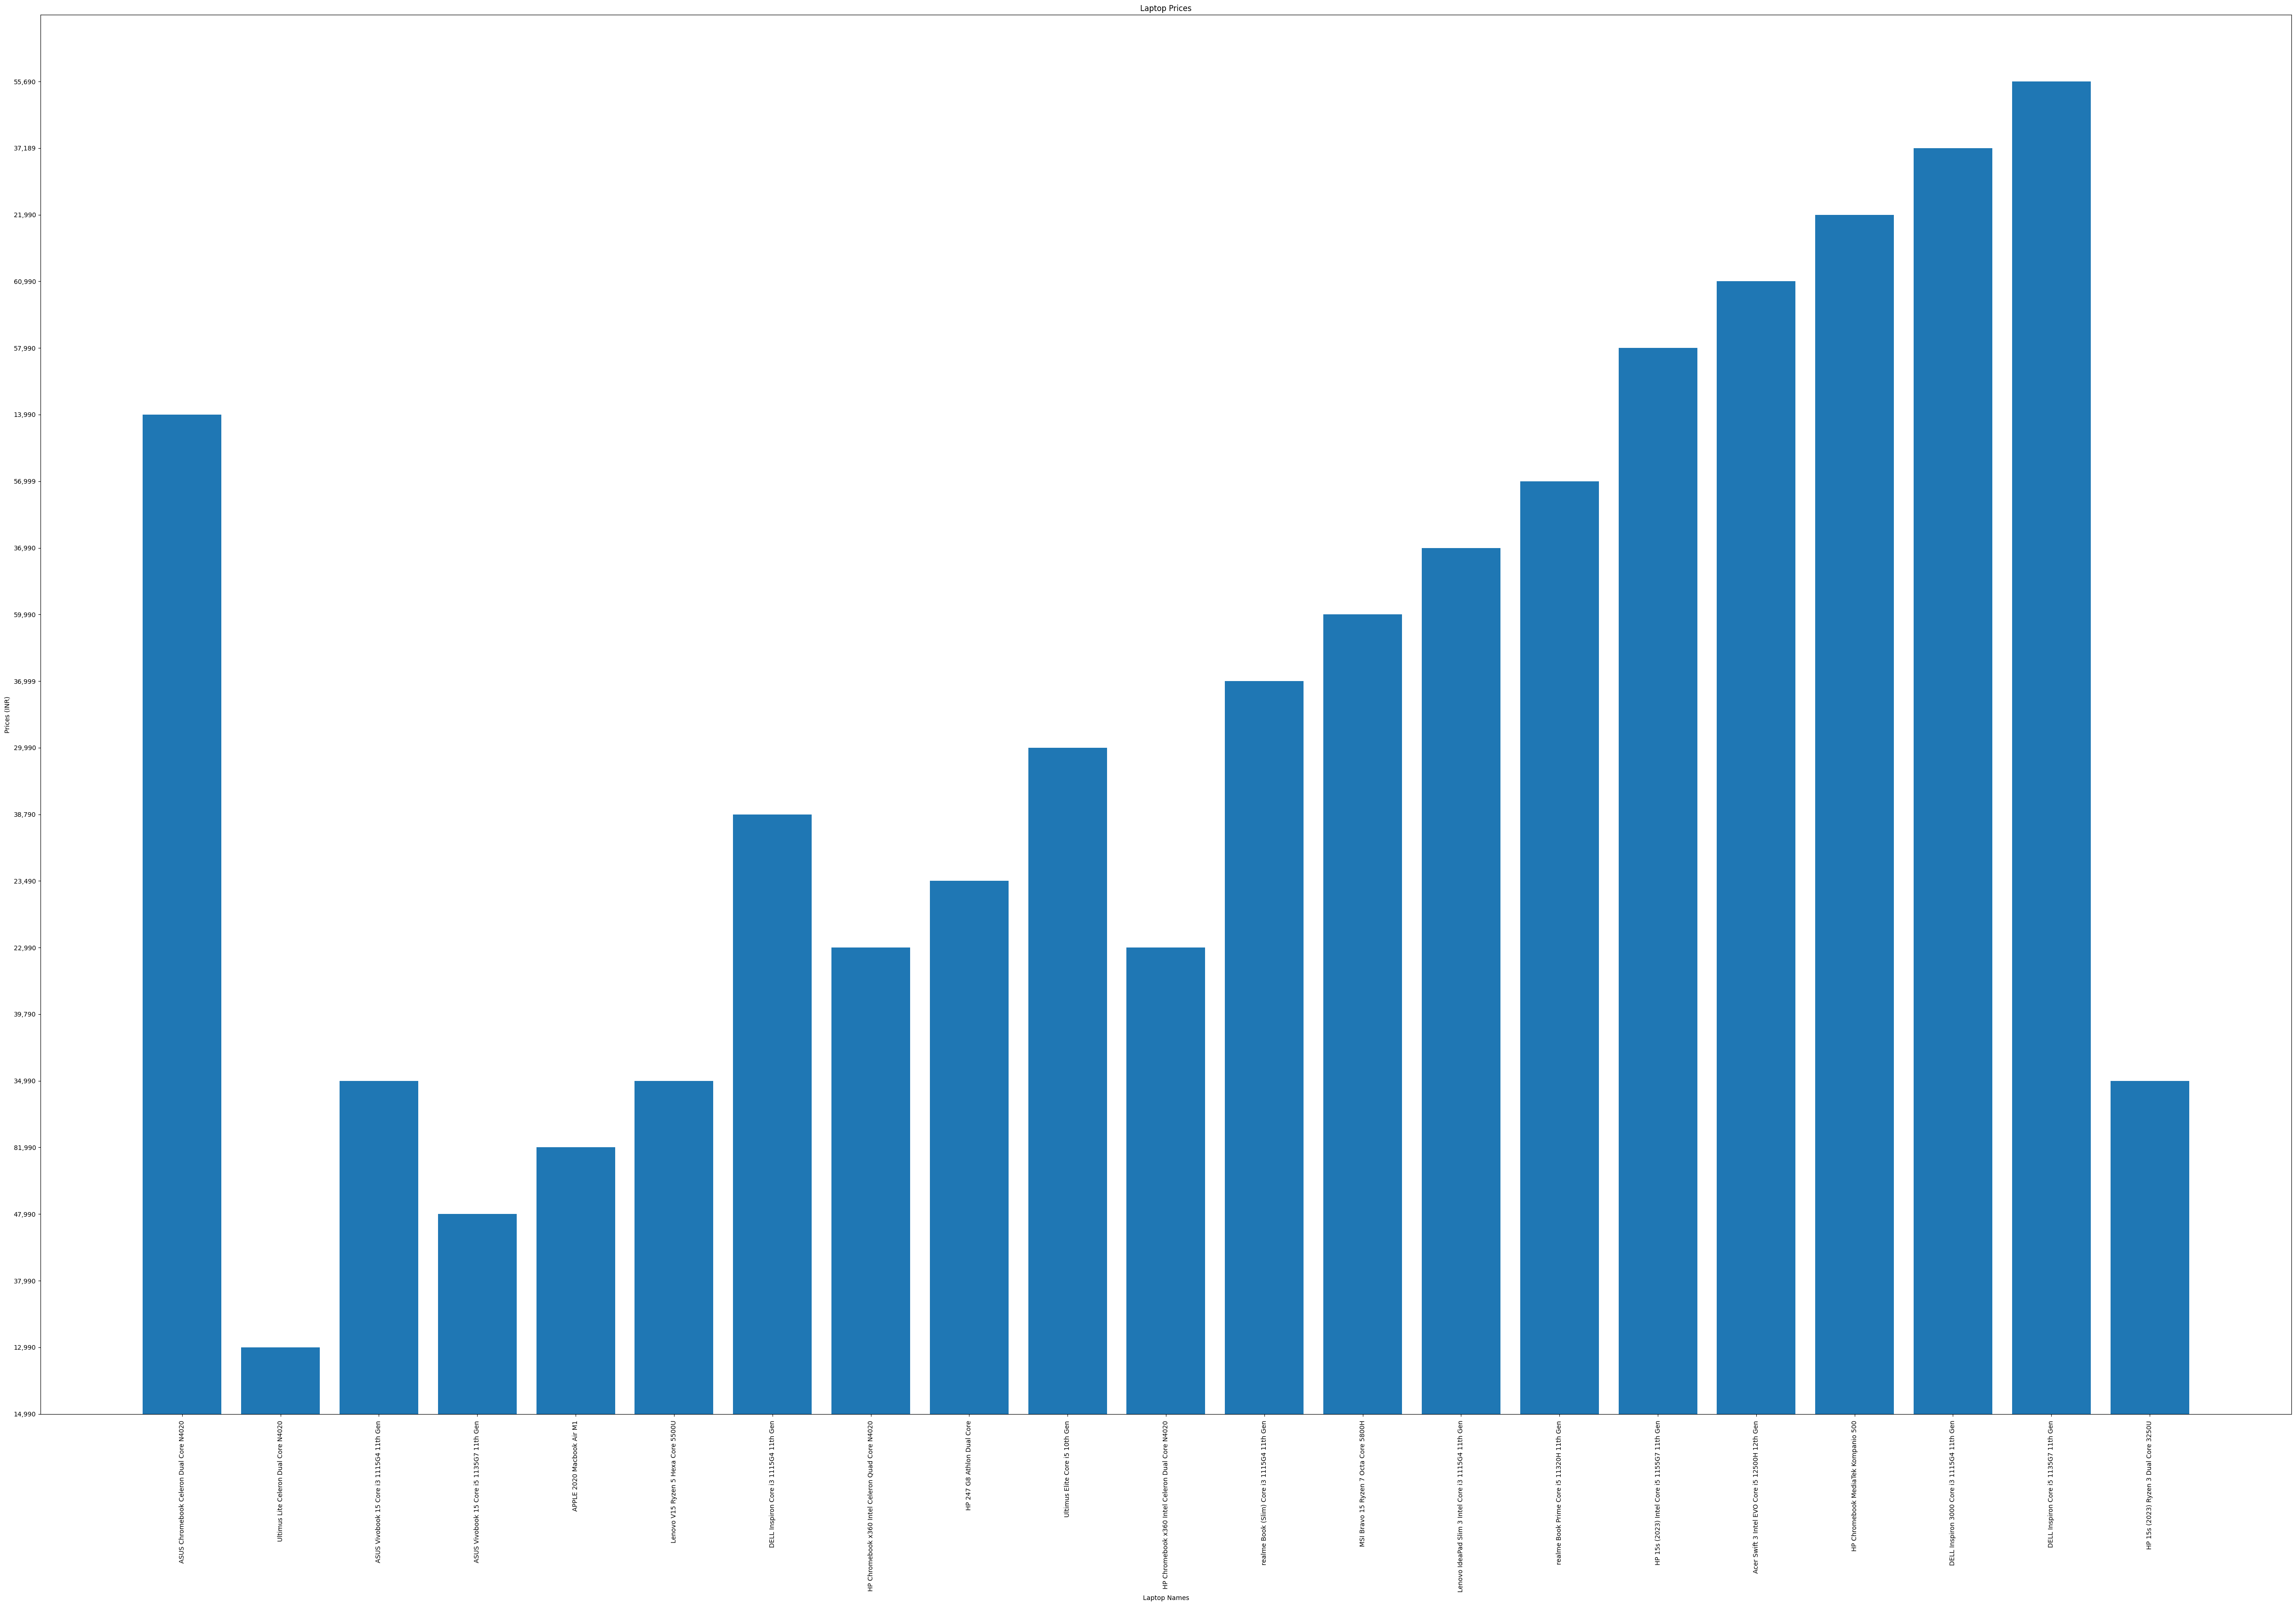

In [38]:
laptop_names = newer_df['Laptop Name']
prices = newer_df['Price (INR)']

plt.figure(figsize=(50, 35))
plt.bar(laptop_names, prices)
plt.xlabel('Laptop Names')
plt.ylabel('Prices (INR)')
plt.title('Laptop Prices')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()


TypeError: ignored

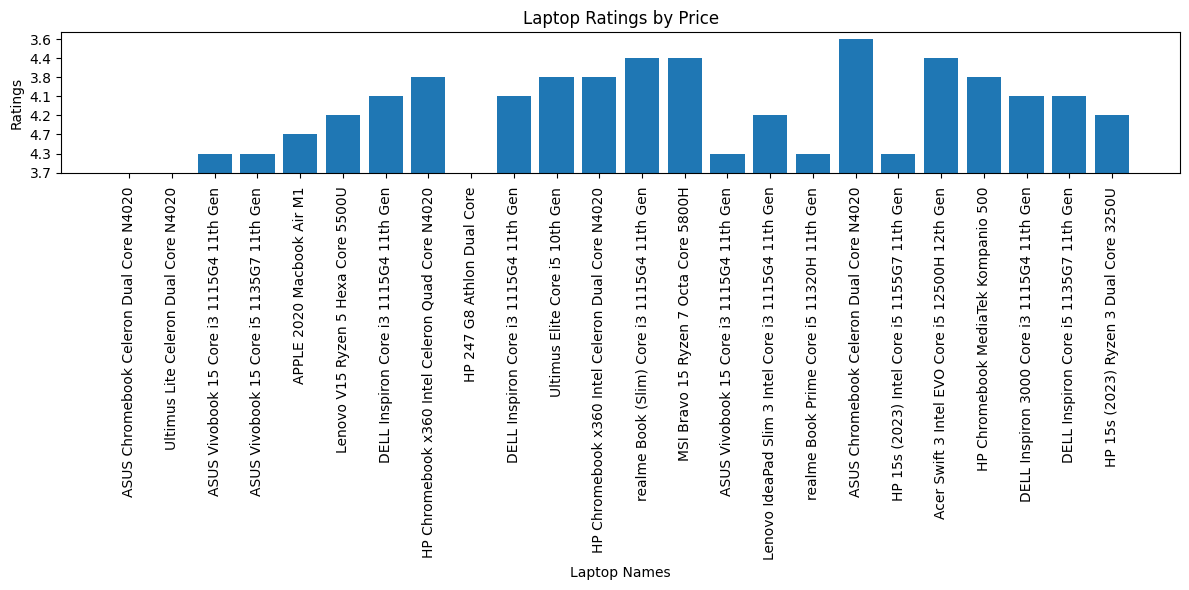

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming newer_df has columns 'LaptopName', 'Price', and 'Rating'
laptop_names = newer_df['Laptop Name']
prices = newer_df['Price (INR)']
ratings = newer_df['Rating (5)']

# Create an array of indices for the x-axis locations
x_indices = np.arange(len(laptop_names))

plt.figure(figsize=(12, 6))
plt.bar(x_indices, ratings, tick_label=laptop_names)
plt.xlabel('Laptop Names')
plt.ylabel('Ratings')
plt.title('Laptop Ratings by Price')
plt.xticks(rotation=90)
plt.tight_layout()

# Add laptop names just above each bar
for i, rating in enumerate(ratings):
    plt.text(x_indices[i], rating + 0.02, laptop_names[i], rotation=90, ha='center', va='bottom')

plt.show()


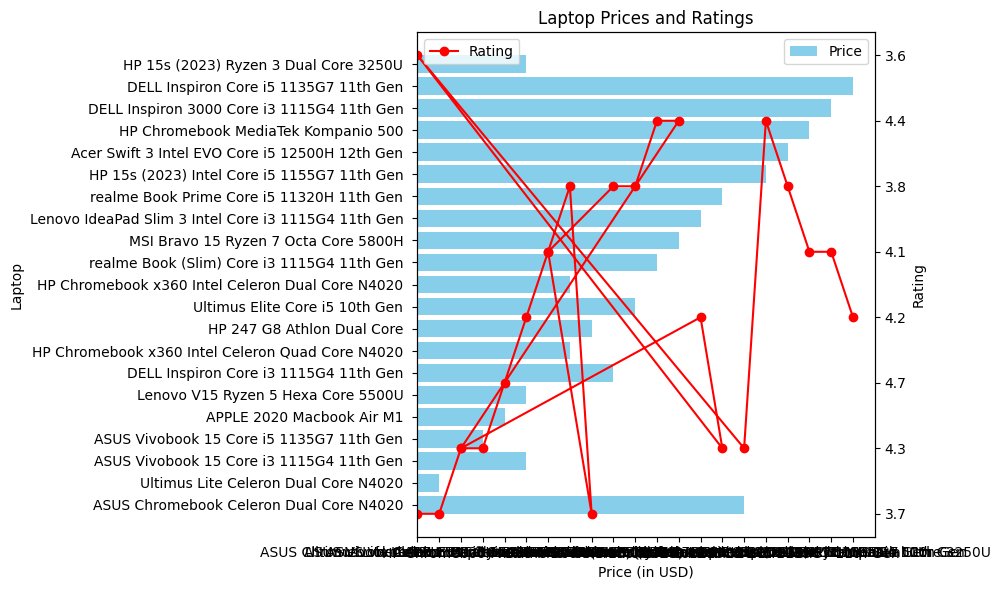

In [46]:

# Sample data (replace this with your dataset)
laptop_names = newer_df['Laptop Name']
prices = newer_df['Price (INR)']
ratings = newer_df['Rating (5)']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(laptop_names, prices, color='skyblue', label='Price')
plt.xlabel('Price (in USD)')
plt.ylabel('Laptop')
plt.title('Laptop Prices and Ratings')
plt.legend()

# Create a second y-axis for ratings
ax2 = plt.gca().twinx()
ax2.plot(laptop_names, ratings, color='red', marker='o', label='Rating')
ax2.set_ylabel('Rating')

# Show the plot
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


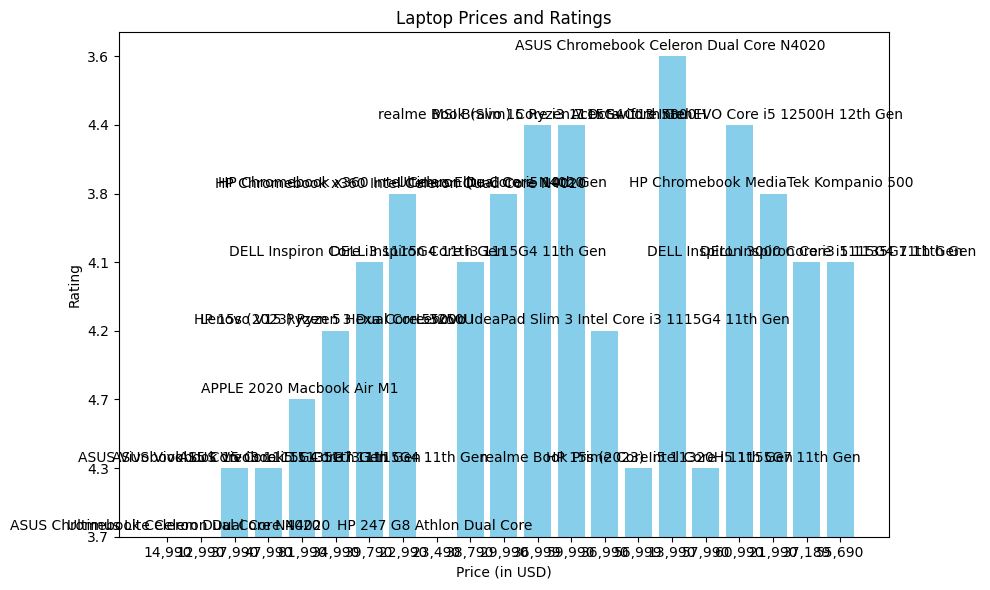

In [51]:

laptop_names = newer_df['Laptop Name']
prices = newer_df['Price (INR)']
ratings = newer_df['Rating (5)']

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(prices, ratings, color='skyblue')

# Add laptop names within the bars
for bar, name in zip(bars, laptop_names):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, name,
             ha='center', va='bottom')

plt.xlabel('Price (in INR)')
plt.ylabel('Rating (out of 5)')
plt.title('Laptop Prices and Ratings')

# Show the plot
plt.tight_layout()
plt.show()


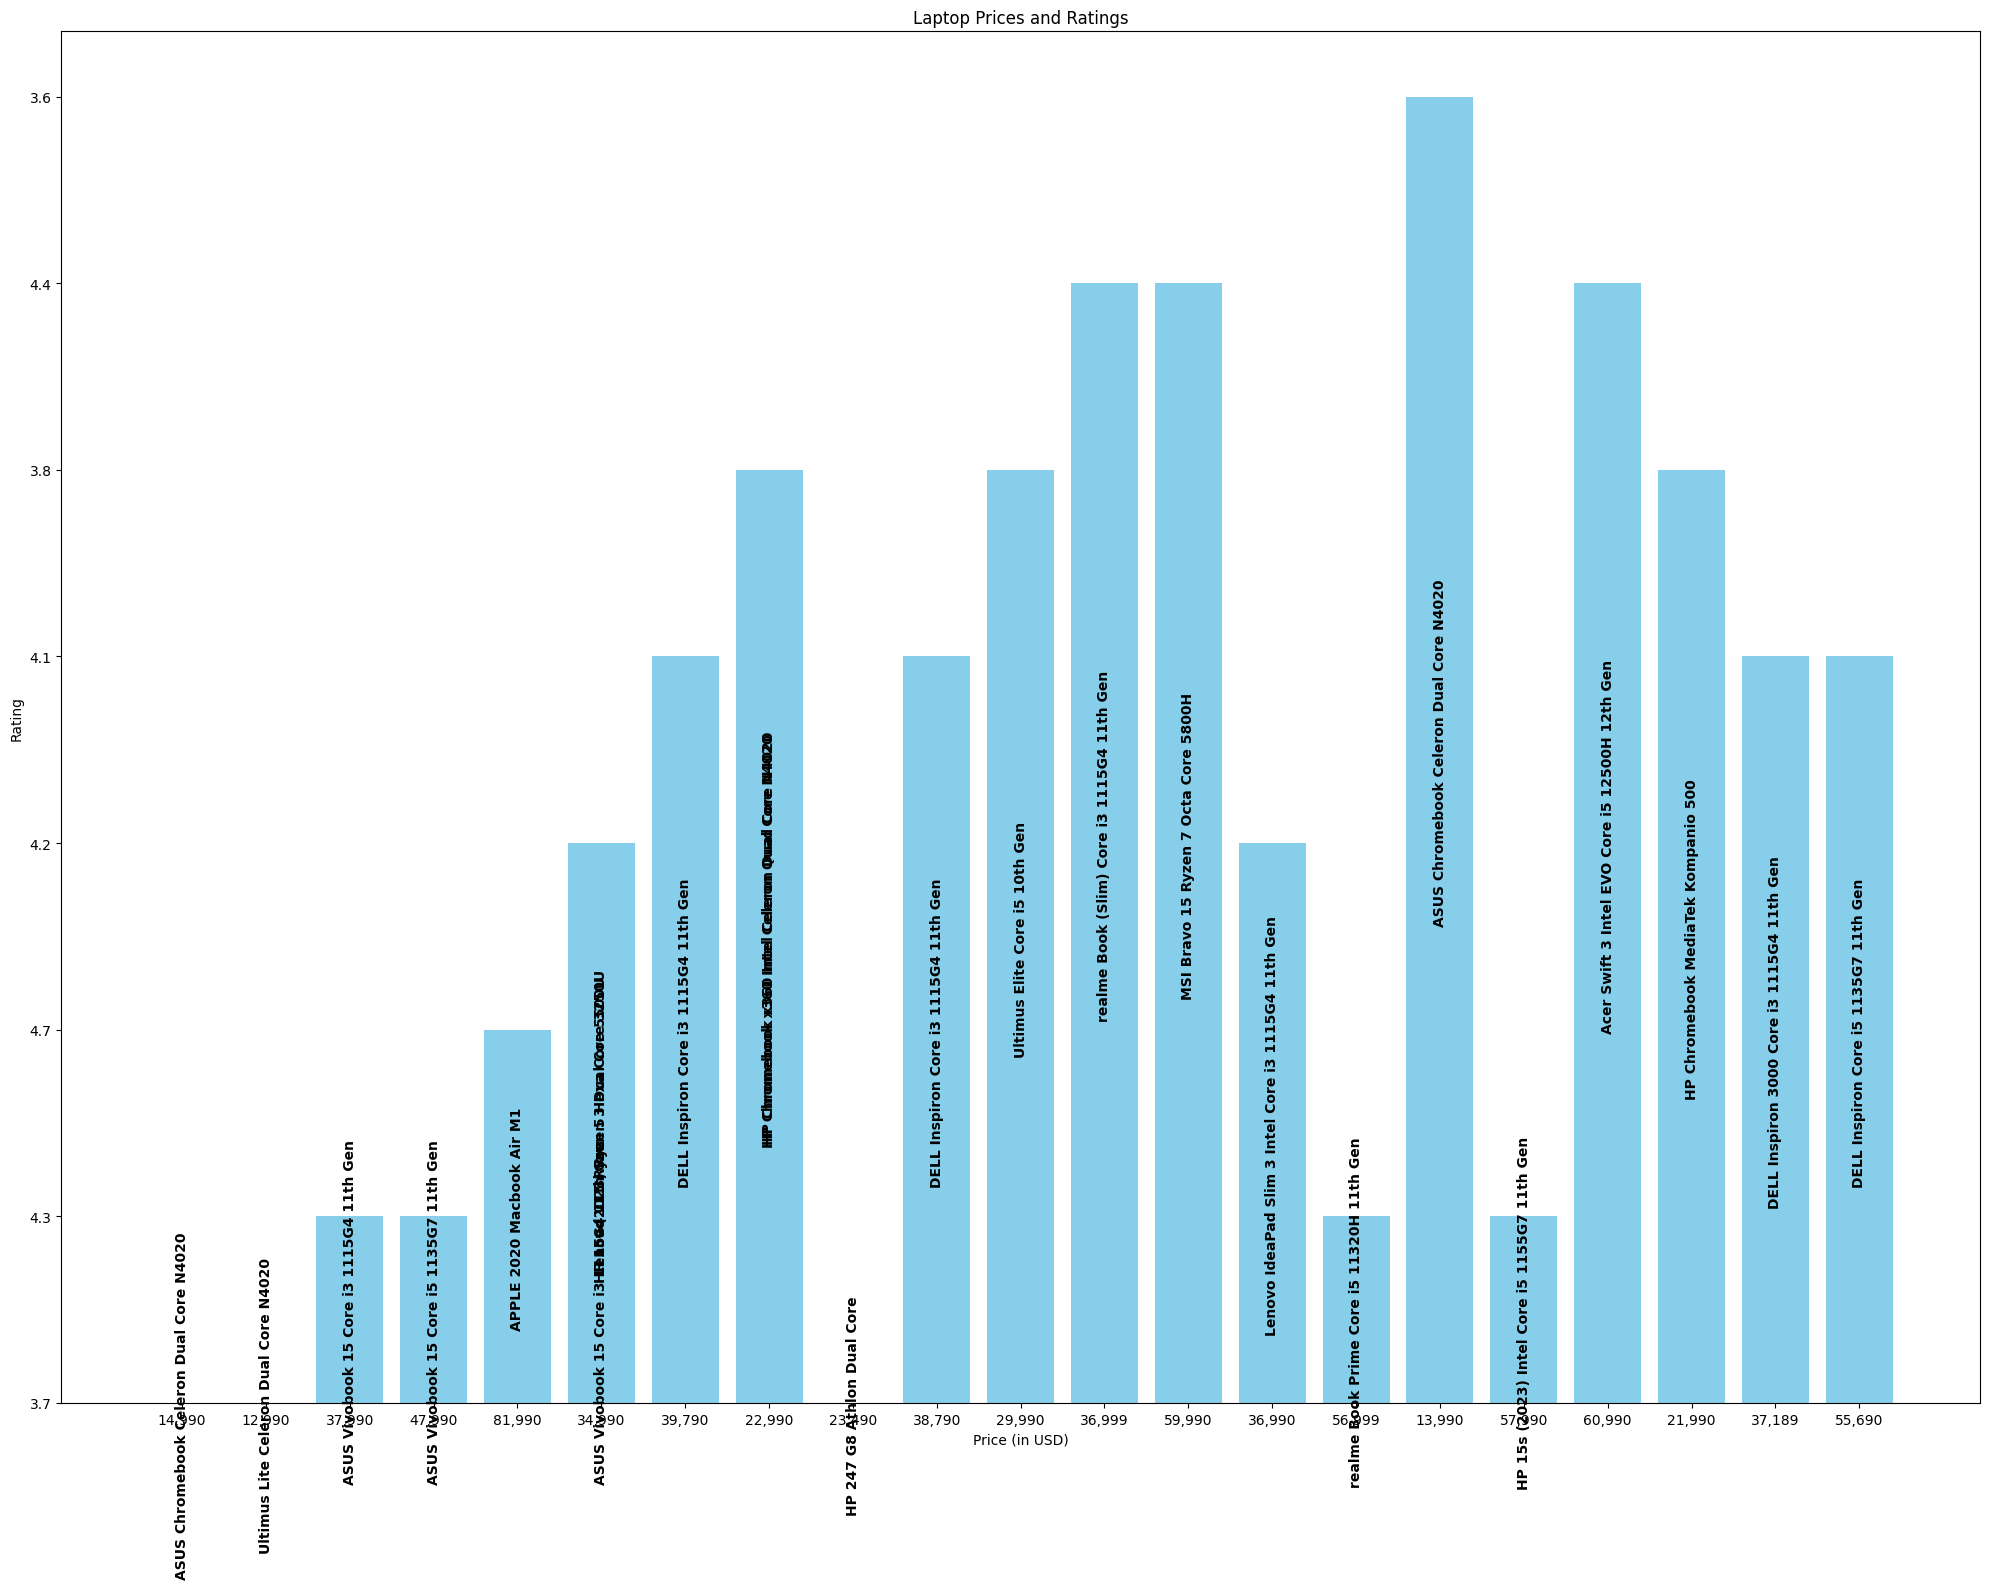

In [59]:
import matplotlib.pyplot as plt

laptop_names = newer_df['Laptop Name']
prices = newer_df['Price (INR)']
ratings = newer_df['Rating (5)']


# Create a bar plot
plt.figure(figsize=(20, 16))
bars = plt.bar(prices, ratings, color='skyblue')

# Add laptop names inside each bar vertically
for bar, name in zip(bars, laptop_names):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, name,
             ha='center', va='center', color='black', fontsize=10, fontweight='bold', rotation=90)

plt.xlabel('Price (in USD)')
plt.ylabel('Rating')
plt.title('Laptop Prices and Ratings')

# Show the plot
plt.tight_layout()
plt.show()
